# Draft of in-class transcript from Lecture 11, February 20, 2019


# Imports and defs for lecture

In [4]:
# These are the standard imports for CS 111. 
# This list may change as the quarter goes on.

import os
import math
import time
import struct
import json
import pandas as pd
import networkx as nx
import numpy as np
import numpy.linalg as npla
import scipy
import scipy.sparse.linalg as spla
from scipy import sparse
from scipy import linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib tk


# Bits and pieces for lecture

In [26]:
# help(integrate.solve_ivp)

Text(0.5,1,'ydot = y/2')

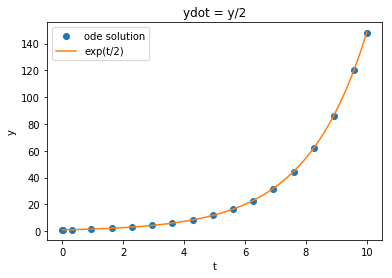

In [10]:
# demo of ode23tx.m = rk23.py
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = y/2
    return ydot

tspan = (0,10)
yinit = [1]

sol = integrate.solve_ivp(fun = f, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], 'o', label='ode solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, np.exp(tt/2), label='exp(t/2)')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = y/2')

Text(0.5,1,'ydot = -y/2')

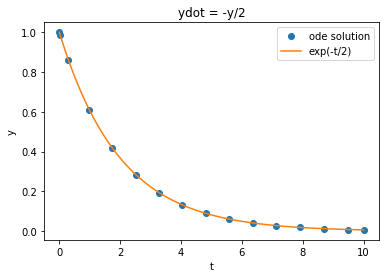

In [12]:
# demo of rk23.py = ode23.m
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = -y/2
    return ydot

tspan = (0,10)
yinit = [1]

sol = integrate.solve_ivp(fun = f, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], 'o', label = 'ode solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, np.exp(-tt/2), label='exp(-t/2)')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = -y/2')

Text(0.5,1,'ydot = t/2')

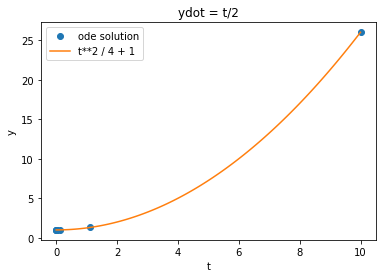

In [13]:
# demo of rk23.py = ode23.m
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = t/2
    return ydot

tspan = (0,10)
yinit = [1]

sol = integrate.solve_ivp(fun = f, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], 'o', label = 'ode solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, tt**2/4+1, label='t**2 / 4 + 1')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = t/2')

Text(0.5,1,'Lotka-Volterra starting with 300 rabbits and 150 foxes')

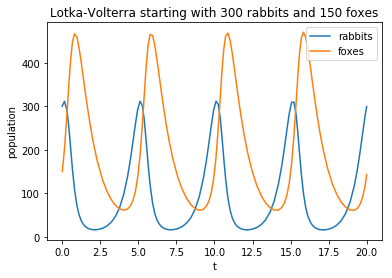

In [19]:
# demo of lotka-volterra equations
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,20)
rabbits_0 = 300
foxes_0   = 150
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label = 'rabbits')
plt.plot(sol.t, sol.y[1], label = 'foxes')
plt.legend()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Lotka-Volterra starting with %d rabbits and %d foxes' % (rabbits_0, foxes_0))

Text(0.5,1,'Lotka-Volterra starting with 15 rabbits and 22 foxes')

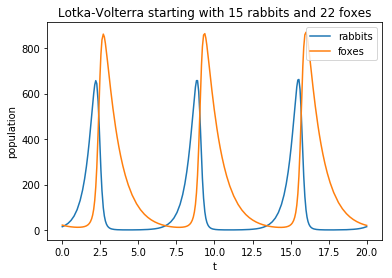

In [20]:
# demo of lotka-volterra equations
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,20)
rabbits_0 = 15
foxes_0   = 22
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label = 'rabbits')
plt.plot(sol.t, sol.y[1], label = 'foxes')
plt.legend()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Lotka-Volterra starting with %d rabbits and %d foxes' % (rabbits_0, foxes_0))

Text(0.5,1,'Lotka-Volterra starting with 102 rabbits and 198 foxes')

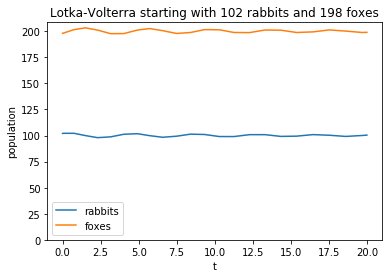

In [36]:
# demo of lotka-volterra equations
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,20)
rabbits_0 = 102
foxes_0   = 198
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label = 'rabbits')
plt.plot(sol.t, sol.y[1], label = 'foxes')
plt.gca().set_ylim([0,None])
plt.legend()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Lotka-Volterra starting with %d rabbits and %d foxes' % (rabbits_0, foxes_0))

Text(0.5,1,'Lotka-Volterra starting with 100 rabbits and 200 foxes')

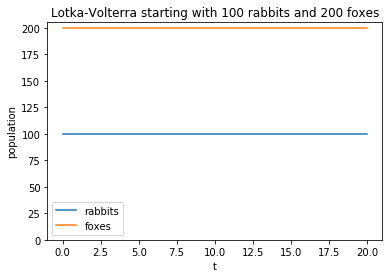

In [37]:
# demo of lotka-volterra equations
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,20)
rabbits_0 = 100
foxes_0   = 200
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label = 'rabbits')
plt.plot(sol.t, sol.y[1], label = 'foxes')
plt.gca().set_ylim([0,None])
plt.legend()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Lotka-Volterra starting with %d rabbits and %d foxes' % (rabbits_0, foxes_0))

Text(0.5,1,'Phase space plot')

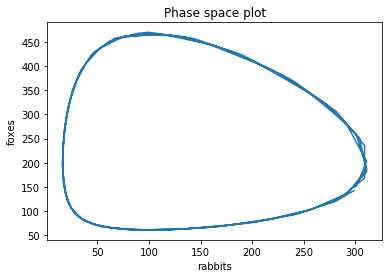

In [32]:
# demo of lotka-volterra equations
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,20)
rabbits_0 = 300
foxes_0   = 150
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

#sol
#print('sol.t:', sol.t.shape)
#print('sol.y:', sol.y.shape)
#for i in range(len(sol.t)):
#    print('time: %5.2f  rabbits: %5.1f  foxes: %5.1f' % (sol.t[i], sol.y[0,i], sol.y[1,i]))
    
%matplotlib inline
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('rabbits')
plt.ylabel('foxes')
plt.title('Phase space plot')

Text(0.5,1,'Harmonic oscillator with y(0) = 0.50, ydot(0) = 0.00')

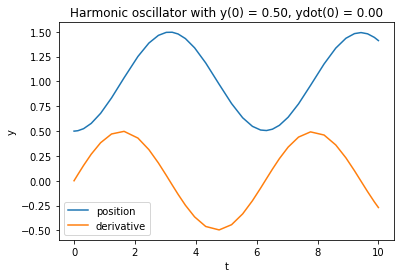

In [43]:
def weightf(t, y):
    """function to be integrated to solve a second-order ODE for a harmonic oscillator
    Input:
      t is a scalar time
      y is a vector of variables,
        in this case y = [position, 1st derivative]
    Output:
      ydot is the vector dy/dt,
        in this case ydot = [1st derivative, 2nd derivative]
    
    The second-order ODE being integrated is d^2 y / dt^2 = 1 - y.
    """
    ydot = [y[1] , 1-y[0]]
    return ydot

tspan = (0,10)
yinit = [1/2, 0]

sol = integrate.solve_ivp(fun = weightf, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label='position')
plt.plot(sol.t, sol.y[1], label='derivative')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Harmonic oscillator with y(0) = %.2f, ydot(0) = %.2f' % (yinit[0], yinit[1]))

Text(0.5,1,'Harmonic oscillator with y(0) = 1.50, ydot(0) = 0.00')

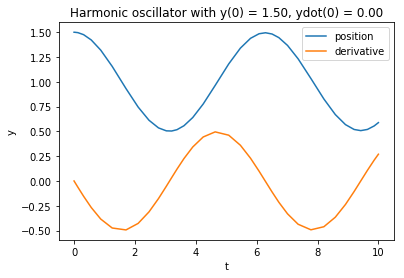

In [39]:
def weightf(t, y):
    """function to be integrated to solve a second-order ODE for a harmonic oscillator
    Input:
      t is a scalar time
      y is a vector of variables,
        in this case y = [position, 1st derivative]
    Output:
      ydot is the vector dy/dt,
        in this case ydot = [1st derivative, 2nd derivative]
    
    The second-order ODE being integrated is d^2 y / dt^2 = 1 - y.
    """
    ydot = [y[1] , 1-y[0]]
    return ydot

tspan = (0,10)
yinit = [1.5, 0]

sol = integrate.solve_ivp(fun = weightf, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label='position')
plt.plot(sol.t, sol.y[1], label='derivative')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Harmonic oscillator with y(0) = %.2f, ydot(0) = %.2f' % (yinit[0], yinit[1]))

Text(0.5,1,'Harmonic oscillator with y(0) = 1.00, ydot(0) = 0.00')

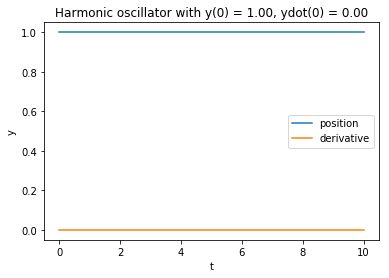

In [40]:
def weightf(t, y):
    """function to be integrated to solve a second-order ODE for a harmonic oscillator
    Input:
      t is a scalar time
      y is a vector of variables,
        in this case y = [position, 1st derivative]
    Output:
      ydot is the vector dy/dt,
        in this case ydot = [1st derivative, 2nd derivative]
    
    The second-order ODE being integrated is d^2 y / dt^2 = 1 - y.
    """
    ydot = [y[1] , 1-y[0]]
    return ydot

tspan = (0,10)
yinit = [1, 0]

sol = integrate.solve_ivp(fun = weightf, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label='position')
plt.plot(sol.t, sol.y[1], label='derivative')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Harmonic oscillator with y(0) = %.2f, ydot(0) = %.2f' % (yinit[0], yinit[1]))

Text(0.5,1,'Harmonic oscillator with y(0) = 1.00, ydot(0) = 0.25')

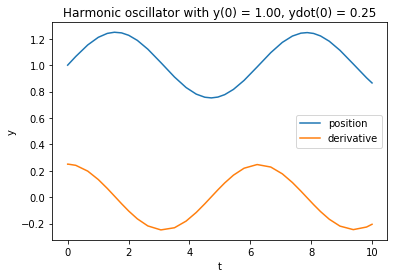

In [42]:
def weightf(t, y):
    """function to be integrated to solve a second-order ODE for a harmonic oscillator
    Input:
      t is a scalar time
      y is a vector of variables,
        in this case y = [position, 1st derivative]
    Output:
      ydot is the vector dy/dt,
        in this case ydot = [1st derivative, 2nd derivative]
    
    The second-order ODE being integrated is d^2 y / dt^2 = 1 - y.
    """
    ydot = [y[1] , 1-y[0]]
    return ydot

tspan = (0,10)
yinit = [1, .25]

sol = integrate.solve_ivp(fun = weightf, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label='position')
plt.plot(sol.t, sol.y[1], label='derivative')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Harmonic oscillator with y(0) = %.2f, ydot(0) = %.2f' % (yinit[0], yinit[1]))

In [139]:
def ode1(fun, t_span, y0, h):
    """demo version of simple Euler method
    
    ode1(F, tspan, y0, h) uses fixed step size h and plots 1D results
    """
    
    # First make the inputs into numpy arrays
    t0     = np.array(t_span[0]).reshape(1)
    tfinal = np.array(t_span[1]).reshape(1)
    y0     = np.array(y0).reshape(len(y0), 1)
    
    # Initialize the list of solution points
    sol_t = t0
    sol_y = y0

    step = 0
    t = t0
    y = y0
    while t < tfinal:
        y = y + h * np.array(fun(t, y))
        t = t + h
        sol_t = np.concatenate((sol_t, t))
        sol_y = np.concatenate((sol_y, y), axis = 1)
        step += 1
    print('ode1 took', step, 'steps')
    return sol_t, sol_y


ode1 took 10 steps


Text(0.5,1,'ydot = y/2')

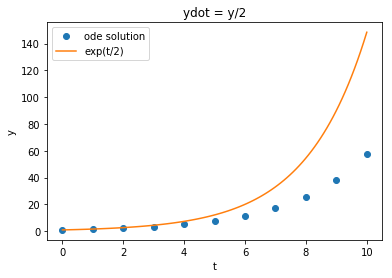

In [145]:
# demo of ode1
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = y/2
    return ydot

tspan = (0,10)
yinit = [1]

sol_t, sol_y = ode1(fun = f, t_span = tspan, y0 = yinit, h = 1)

%matplotlib inline
plt.plot(sol_t, sol_y[0], 'o', label='ode solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, np.exp(tt/2), label='exp(t/2)')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = y/2')

ode1 took 300 steps


Text(0.5,1,'Harmonic oscillator with y(0) = 0.50, ydot(0) = 0.00')

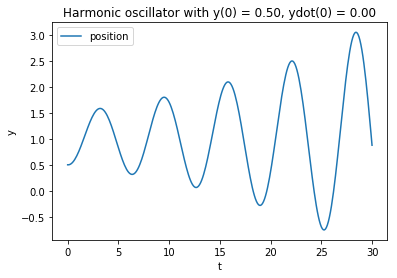

In [144]:
def weightf(t, y):
    """function to be integrated to solve a second-order ODE for a harmonic oscillator
    Input:
      t is a scalar time
      y is a vector of variables,
        in this case y = [position, 1st derivative]
    Output:
      ydot is the vector dy/dt,
        in this case ydot = [1st derivative, 2nd derivative]
    
    The second-order ODE being integrated is d^2 y / dt^2 = 1 - y.
    """
    ydot = [y[1] , 1-y[0]]
    return ydot

tspan = (0,30)
yinit = [1/2, 0]

sol_t, sol_y = ode1(fun = weightf, t_span = tspan, y0 = yinit, h = .1)

%matplotlib inline
plt.plot(sol_t, sol_y[0], label='position')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Harmonic oscillator with y(0) = %.2f, ydot(0) = %.2f' % (yinit[0], yinit[1]))

In [ ]:
y0, y1 = np.meshgrid(range(4), range(4))
print(y0)
print(y1)

In [155]:
coords = np.array(range(60)) / 2 - 15
y0,y1 = np.meshgrid(coords, coords)
print(y0)
print(y1)

[[-15.  -14.5 -14.  ...  13.5  14.   14.5]
 [-15.  -14.5 -14.  ...  13.5  14.   14.5]
 [-15.  -14.5 -14.  ...  13.5  14.   14.5]
 ...
 [-15.  -14.5 -14.  ...  13.5  14.   14.5]
 [-15.  -14.5 -14.  ...  13.5  14.   14.5]
 [-15.  -14.5 -14.  ...  13.5  14.   14.5]]
[[-15.  -15.  -15.  ... -15.  -15.  -15. ]
 [-14.5 -14.5 -14.5 ... -14.5 -14.5 -14.5]
 [-14.  -14.  -14.  ... -14.  -14.  -14. ]
 ...
 [ 13.5  13.5  13.5 ...  13.5  13.5  13.5]
 [ 14.   14.   14.  ...  14.   14.   14. ]
 [ 14.5  14.5  14.5 ...  14.5  14.5  14.5]]


In [156]:
altitude = (y0 / 1000)**2 + y1**2

In [158]:
np.max(altitude)


225.000225

In [159]:
np.min(altitude)

0.0

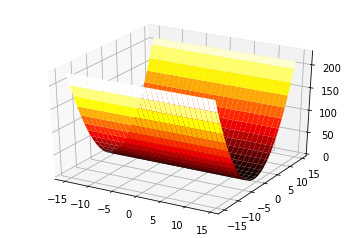

In [163]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax = fig.gca()
ax.plot_surface(y0, y1, altitude, cmap=cm.hot)

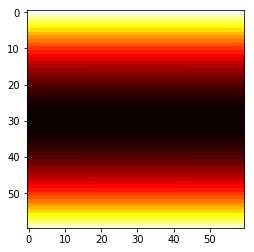

In [164]:
plt.imshow(altitude, cmap=cm.hot)